# Session: Instructional Case Studies with Data Sets for YOUR Instruction

## Two-Week Introductory Python Module

### J. V. Krogmeier, Purdue University

## Outline of Talk

1. USDA-NIFA: "Computational Skills Development for Next Generation Agriscience Professionals for Sustaining Data Driven Agriculture" 

     * PI: D. Saraswat (Purdue)
     * Institutions: Tuskegee, Kentucky, Purdue
     
     
2. Prerequisites and Learning Objectives

3. Overview of the Two Week Module

4. Requirements to get the module working

5. Sample of the Module

6. First thoughts on how well it worked

7. Acknowledgements




## USDA-NIFA: "Computational Skills Development for Next Generation Agriscience Professionals for Sustaining Data Driven Agriculture"

### The Challenge Addressed:

Educational institutions have not capitalized on **ag informatics** opportunities driving increased demand for data science/informatics graduates in the ag workforce.

### Audience:

Undergraduate students starting from first year. No prerequisite knowledge of programming to allow access to a large pool of students.

## Target Objectives

1.  Attract ag students to **ag informatics careers** and train them by development of ...

    - One two-week course module (for incorporation into existing courses)
    - Three semester long courses on software applications and computational skills
    

2. Provide a collaborative environment for building open source communities in agriculture via publication of videos, libraries, code, and course materials.

## Prerequisites and Learning Objectives

1. Prerequisites = **NONE**

2. Learning Objectives:

    - Understand the elements of the python programming language (data types, program control, elementary packages -- math, numpy, matplotlib, file input-output)
    - How to interface python with spreadsheets (csv read, etc.)
    - How to do API calls from python
    - Examples of statistical computations using python
    - Visualization

## Overview of the Two Week Module

There were two lecture sessions and one lab session in each week.

### Week 1

#### Lecture 1

Variables (integers, floats, strings, booleans), data types (lists, dictionaries, etc.), conversions

Control statements (`if-else`, `for`, `while`)

`math`, `numpy`, `matplotlib` packages

An example of computing field capacity (acres/hour) of an tractor-implement as a function of speed, implement width, and swath efficiency

#### Lecture 2

File input and output

Reading from a csv file

Data wrangling and visualization on county average wheat yields (from USDA NASS)

#### Lab 1

Writing python code to implement certain excel calculations seen in previous lectures (i.e., before the 2 week module)

Example coding of the chutes and ladders game implemented previously in excel


### Week 2

#### Lecture 3

Visualization of the wheat yields data wrangling exercise

`numpy` array slicing

Looking for trends in county average wheat yields over time

Mean, standard deviation, least-squares fitting of a line


#### Lecture 4

API calls with examples from `thedogapi` and `USDA NASS`

Elementary mapping

#### Lab 2

Step by step examination of county average corn yields over time for a state of the student's choice. Solution skeleton given with blanks to fill in based on examining the code in the wheat yields example.

# Some Example Code/Assignments ...

## The Chutes and Ladders Game ...

Prof. Buckmaster introduced the chutes and ladders game as an example of computing using Excel. The typical game board, containing 100 squares, is shown below.

<img align="left" src='FigsData-ASABE/Chutes&LaddersImage.png' width="300"/>

### Short version of the rules:

1. Assume there are N players, who have been ordered according to the order in which they will play by some random means (e.g., by rolling the dice, drawing straws, etc.)

2. Players all start at position 0.

3. At time $k$ ($k = 0, \, 1, \, 2, \ldots$) the positions of the N players are indicated by $p_n(k)$ for $n = 1, \, 2, \, 3, \ldots , \, N$.

4. Starting with player 1, each player throws a die and adds the value shown on the die to his position, i.e., $p_1(k+1) = p_1(k)$ + {the roll of the die}. Then the player moves to that position on the board. If there is no chute or ladder at the new position, he remains there and his turn ends. On the other hand, if there is a chute or a ladder at the new position, the player must climb the ladder or fall down the chute as the case may be .... this change then yields the new position.

5. The first player to reach position 100 exactly wins the game. If a player rolls the die and computes a new position that would take her past 100, then the roll is voided and she remains at her original position.

## Following is a function which rolls the die and computes the new position of a player.

In [1]:
# Include needed python packages
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from random import Random

random.seed(a=None,version=2)

# This dictionary stores the chutes and ladders board.
CandLTable = {1:38, 4:14, 9:31, 16:6, 21:42, 28:84, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 71:91, 80:100, 87:24, 93:73, 95:75, 98:78}

# The function to make a move
def CandL_make_a_move(position,CandLTable):
    rand = Random(None)
    roll = rand.randint(1, 6)
    if position + roll > 100:
        return position
    position += roll
    position = CandLTable.get(position, position)
    return position


In [2]:
# Now try the function ...
CandL_make_a_move(0,CandLTable)

5

# Lab/HW Problem: Program Chutes and Ladders Game

Write a program which plays a game between two people until one wins and produces a record of the game play.

If you have time convert your single game code into a function and then write a program to play a large number of games one after another keeping a record of who won and how long the game lasted. Then compute statistics and/or histograms.

Finally, if you still can't sleep explore how changes to the positions of chutes and ladders might change the game.

# Solution

### Basic Game

Player 2 Wins!!


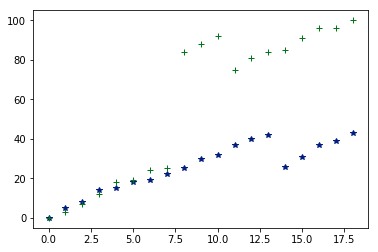

In [3]:
P1 = np.array([0])
P2 = np.array([0])

p1 = 0
p2 = 0

while (p1 < 100 and p2 < 100):
    p1 = CandL_make_a_move(p1, CandLTable)
    p2 = CandL_make_a_move(p2, CandLTable)
    P1 = np.append(P1, p1)
    P2 = np.append(P2, p2)
    if p1 == 100:
        print('Player 1 Wins!!')
    elif p2 == 100:
        print('Player 2 Wins!!')

# This simply plots the positions of the two players over the
# course of the game.
fig3 = plt.figure()
plt.style.use('seaborn-dark-palette')
plt.plot(P1,'*')
plt.plot(P2,'+')

### Playing many games

Average number of rounds per game is 28.05
Player 1 won 159 of 300 games
Player 2 won 141 of 300 games


(array([11., 20., 36., 31., 34., 25., 28., 21., 20., 14.,  9., 10.,  9.,
         5.,  5.,  6.,  5.,  1.,  1.,  1.,  2.,  0.,  4.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.]),
 array([ 7.        , 10.06666667, 13.13333333, 16.2       , 19.26666667,
        22.33333333, 25.4       , 28.46666667, 31.53333333, 34.6       ,
        37.66666667, 40.73333333, 43.8       , 46.86666667, 49.93333333,
        53.        , 56.06666667, 59.13333333, 62.2       , 65.26666667,
        68.33333333, 71.4       , 74.46666667, 77.53333333, 80.6       ,
        83.66666667, 86.73333333, 89.8       , 92.86666667, 95.93333333,
        99.        ]),
 <a list of 30 Patch objects>)

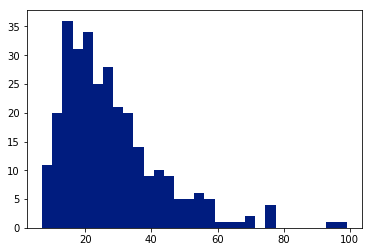

In [4]:
# Convert game code to function

def CandL_play_a_game(CandLTable):
    p1 = 0
    p2 = 0
    Nmoves = 0
    p1wins = 0
    p2wins = 0
    while (p1 < 100 and p2 < 100):
        p1 = CandL_make_a_move(p1, CandLTable)
        p2 = CandL_make_a_move(p2, CandLTable)
        Nmoves += 1
        if p1 == 100:
            p1wins += 1
        elif p2 == 100:
            p2wins += 1
    return Nmoves, p1wins, p2wins
     
Ngames = 300
Np1wins = 0
Np2wins = 0

GameLengths = np.array([])

for k in range(Ngames):
    L = CandL_play_a_game(CandLTable)
    Np1wins += L[1]
    Np2wins += L[2]
    GameLengths = np.append(GameLengths, L[0])

print('Average number of rounds per game is {:.2f}'.format(np.mean(GameLengths)))
print('Player 1 won {} of {} games'.format(Np1wins,Ngames))
print('Player 2 won {} of {} games'.format(Np2wins,Ngames))

plt.hist(GameLengths, bins=30)

### Modify the table to see it's effect on the game ...

In [ ]:
# This dictionary stores the chutes and ladders board.
CandLTable2 = {4:14, 9:31, 16:6, 21:42, 36:44, 47:26, 49:11, 51:67,
             56:53, 63:19, 64:60, 80:2, 87:24, 93:73, 95:75, 98:78}

Ngames = 300
Np1wins = 0
Np2wins = 0

GameLengths = np.array([])

for k in range(Ngames):
    L = CandL_play_a_game(CandLTable2)
    Np1wins += L[1]
    Np2wins += L[2]
    GameLengths = np.append(GameLengths, L[0])
    
print('Average number of rounds per game is {:.2f}'.format(np.mean(GameLengths)))
print('Player 1 won {} of {} games'.format(Np1wins,Ngames))
print('Player 2 won {} of {} games'.format(Np2wins,Ngames))

plt.hist(GameLengths, bins=30)

# Lab/HW Problem: Wrangling County Average Corn Yield Data

## In this Lab you will:
 - Get county average corn yield data for Indiana (or another state of interest)
 - Wrangle the data using Excel to delete columns of little or no interest (you could do it in Python but we need to save time)
 - Follow the example of the previous lecture to estimate the corn yield trend over time.

In [ ]:
# Bring in the packages we have used before.

import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

## 1. Data
To get some data for this exercise click on the link: <a href="https://quickstats.nass.usda.gov/" target="_blank">the USDA National Agricultural Statistics Service</a>. I'm using Indiana as an example below, but you are welcome to change it to Iowa, Illinois, Ohio, or name your state. There could, however, be some special cases that would have to be considered for different states.

On the quick stats page you should select: Survey; Crops; Field Crops; Corn; Yield; Corn Grain - Yield, Measured in Bu/Acre; County; Indiana (leave unchecked the rest of the choices).

Then click on the `get data` box at the bottom of the page. A spreadsheet should show up in the browser.

Then click on the `Spreadsheet` towards the top right. This should download a `.csv` file somewhere on your computer or in the docker if you are running this on `mybinder.org`. It will have a nasty long name. Rename it to something convenient.

If you are running on `mybinder.org` you will need to get this `.csv` onto your computer in order to use Excel.

Use Excel to remove un-needed columns.

Upload it to the directory `Lab2Data` in your fork of the 
<a href="https://github.com/jvkrogmeier/HEC-Lab-2" target="_blank">JVK github repo for HEC-Lab-2</a>.

If you are already running in `mybinder.org` you will need to close and restart to have your `.csv` file available ...

## 2. Name your file and put the name in here

In [ ]:
# Replace Lab2Data/XXX.csv with Lab2Data/YourFileName.csv

###my_file_name = 'Lab2Data/XXX.csv'

my_file_name = 'FigsData-ASABE/Wrangled-CornYields.csv'

my_file_name

In [ ]:
# Just run this block which will open the wrangled file for reading 
# only and print the first few lines. What would you change in the 
# block below to see more or fewer lines?

fin = open(my_file_name, "r")

for i in range(20):
    line = fin.readline()
    print(line, end='')

fin.close()

## 3. Remove some unwanted non-counties

There are some names in the County field that correspond to combinations of counties or such. First we need to read the entire file to see what unique county names are present. There are probably some combined counties that we will want to eliminate. Since we are concentrating only on one state we don't need to keep that information ...

Run the code below (and suitably modify where requested) to remove the undesired non-counties.

In the code block below you need to modify the integer indices corresponding to the `Year` column and the `County` column in your csv file. I've set the variables to something that won't work. You need to change it.

In [ ]:
# Open the wrangled file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line to move past header 

# Initialize some empty sets.
years = set()
counties = set()

###yearindex = 59 #You must change this to get the code to work
###countyindex = 137 #You must change this

yearindex = 0
countyindex = 3

for line in fin:
    fields = line.split(',')
    yr = fields[yearindex].replace('"', '')
    years.add(yr)
    c = fields[countyindex].replace('"', '')
    counties.add(c)
                      
fin.close()

## Unique years, unique counties
The set variable `years` will contain the unique years for which we have data. Similarly the set variable `counties` contains the unique locations for which we have data.

In [ ]:
N_unique_years = len(years)
print('The number of unique years is {:2d}.'.format(N_unique_years))
print('The set of years is {}.'.format(years))

In [ ]:
N_unique_counties = len(counties)
print('The number of unique counties is {:2d}.'.format(N_unique_counties))
print('The set of counties is {}.'.format(counties))

### Bad County Names
There are a certain number of county names in the `counties` list, which are not real county names. Define text strings that contain the bad county names so that we can ignore them later. By looking at the set of unique counties printed above, find the names we want to ignore and put them into the string variables below. For the Indiana data there are two bad names. Other states may have more or less ...

`BCN1` and `BCN2` are string variables. Don't forget the quotes.

In [ ]:
# Bad county name 1, 2, 3 ... (BCN1, BCN2, etc)

###BCN1 = Blah # You must change this
###BCN2 = BlahBlah # You must change this

BCN1 = 'OTHER COUNTIES'
BCN2 = 'OTHER (COMBINED) COUNTIES'

In [ ]:
# Just to check 

print('The number of unique counties (before removal) is {:2d}.'.format(N_unique_counties))

# Remove the bad county names ...
counties.remove(BCN1)
counties.remove(BCN2)

N_unique_counties = len(counties)

print('The number of unique counties (after removal) is {:2d}.'.format(N_unique_counties))

## 4. Convert the Sets to Lists and Sort
We originally used sets to hold the `years` and `counties` data in order to impose uniqueness since sets never have duplicate elements. Therefore, when we were originally reading the data if the same year or same state-county pair was read multiple times (and they were), then we would automatically avoid adding duplicates.

Finally, we convert the sets to lists in order to sort them. We particularly want the `years` variable ordered numerically increasing.

In [ ]:
# Convert them to lists. You need to replace XXX with the correct Python
# command to convert the sets to lists.

###years = XXX(years) # You must change this
###counties = XXX(counties) # You must change this

years = list(years)
counties = list(counties)

# Sort the years and counties lists. This is done so that we
# can refer to the data in the numpy array and have the order there
# correspond to the counties and year of interest.

# Two commands need to be run here in order to sort the years 
# and counties lists ...

###put command 1 here
###put command 2 here

years.sort()
counties.sort()

# Print just to see what the ordering looks like
print(years)
print()
print(counties)

## 5. Create the `isdata` and `ydata` arrays
Run the code blocks below (modify as needed) to create a numpy array that contains the information about whether a particular (county, year) has data in your file. The array will have rows indexed by county and columns indexed by year.

You will also define an array `ydata` to contain the yield data. 

In [ ]:
# The variable "isdata" is initialized with zeros. When a one appears
# at a particular row and column it indicates that the corresponding
# county and year has yield data.

isdata = np.zeros((len(counties), len(years)))

# The variable "ydata" is also initialized with zeros.

ydata = np.zeros((len(counties), len(years)))

## Populating data into `isdata` and `ydata`
The next cell reads data from the `Lab2Data/XXX.csv` file and populates the numpy arrays `isdata` and `ydata`. Remember these two arrays were initialized as all zeros.

Below we will use the `index()` method, which returns the numeric index of the first occurrence of an item in a list. We made our `counties` and `years` lists to have unique items.

In [ ]:
# Open the wrangled file.

fin = open(my_file_name, "r")
line = fin.readline() #Read first line to move past header 

# The year values are located in the column indexed by yearindex
# which you set in a previous cell. = County values in the fourth 
# are indexed by countyindex, also set previously. You now need to
# set the variable yieldindex to refer to the column of the csv
# file which contains County average yield values.

###yieldindex = 11 #You must change this to get the code to work

yieldindex = 5

# Note how we use the python method .index in order to properly
# align the data values in the numpy arrays with the list values
# in years and state_county_pairs.

for line in fin:
    fields = line.split(',') #Separate line into individual items
    yr = fields[yearindex].replace('"', '') #Delete extra double quotes
    c = fields[countyindex].replace('"', '') #Delete extra double quotes
    if c in counties:
        rindex = counties.index(c)
        cindex = years.index(yr)
        isdata[rindex, cindex] = 1 #Insert "1" into isdata in proper place
        yd = fields[yieldindex]
        yd = yd.replace('\n', '') #Delete newline character at the end
        yd = yd.replace('"', '') #Delete extra double quotes
        ydata[rindex, cindex] = float(yd) #Insert a numeric yield value in the proper place
                      
fin.close()

## 6. The `if c in counties:` block was not used in the Lecture 3 code. Why is it needed here and not there?

In [ ]:
# Just to look at the array
print(ydata)

In [ ]:
# Just to look at the array
print(isdata)

In [ ]:
# Just run this code, which prepares a meshgrid for contour plots ...
iyrs = range(len(isdata[0,:]))
iscprs = range(len(isdata[:,0]))
IYRS, ISCPRS = np.meshgrid(iyrs,iscprs)

# Defining a function to evaluate values from isdata
def ID(x,y):
    return isdata[x,y]

# Evaluate on the mesh
Z = ID(ISCPRS,IYRS)

In [ ]:
# Make filled contour plot and label axes, etc. ...
plt.contourf(IYRS,ISCPRS,Z, cmap='winter');
plt.ylabel('Indices of counties')
plt.xlabel('Indices of years (starting from 1929)')
plt.title('Data Available (green = have data, blue = no data)')

In [ ]:
# Repeat only for the actual county average yield values
def Y(x,y):
    return ydata[x,y]
Z = Y(ISCPRS,IYRS)

plt.contourf(IYRS,ISCPRS,Z, cmap='YlOrRd');
plt.ylabel('Indices of counties')
plt.xlabel('Indices of years (starting from 1929)')
plt.title('County average yield (bushels/acre)')
plt.colorbar()

In [ ]:
frac = (len(isdata[0,:])*len(isdata[:,0]) - sum(sum(isdata)))/(len(isdata[0,:])*len(isdata[:,0]))

print('Fraction of unavailable data is {:.2f}'.format(frac))

## 7. What is the first thing you notice when comparing the situation with Indiana corn yield data with wheat yield data as in the Lect 2 code?

## 8. Some of the Indiana counties have complete yield data (i.e., for every one of the 92 years). Run the code blocks below to find out which counties they are.

In [ ]:
# Initialize a vector to hold info about which counties contain
# data for every year. Then sequentially multiply all
# of the columns together.
all = np.ones(len(counties))

for i in range(len(years)):
    all = all*isdata[:,i]

In [ ]:
# Look at the result
print(all)

In [ ]:
# Clearly some state-county pairs have data for all years. How many?
all.sum()

## Result of multiplying all rows of `isdata` ...
According to this test there are 45 Indiana counties which have data in all 92 years. Which counties are they?

In [ ]:
c92 = []
i = 0
for c in counties:
    if all[i] > 0:
        c92.append(c)
    i = i + 1

In [ ]:
print(c92)

### Let's use these `c92` counties

### Getting the data for the restricted state_county pairs set ...
In the code block below we want to create a list containing the indices from the entire collection of Indiana counties which correspond to the `c92`

In [ ]:
rindex = []
for c in counties:
    if c in c92:
        rindex.append(counties.index(c))

# This creates the column index set corresponding to the years 
# for which data is available (which is actually every year)
cindex = []
for y in years:
    cindex.append(years.index(y))

## 9. Select a smaller array with continguous data ...
Out of the large array of size 92 x 92 containing county average yield data over various years we want to extract the smaller 45 x 92 array containing county average yield data for our selected state, county pairs of interest and our selected years of interest.

In [ ]:
# Select the 45 rows corresponding to the counties of interest

###select_ydata = XXX[YYY,ZZZ] # You must change this to get the code to work

select_ydata = ydata[rindex,:]

### Plot the individual county average yields on the same axis.

In [ ]:
fig = plt.figure()
plt.style.use('classic')

for k in range(select_ydata.shape[0]):
    plt.plot(select_ydata[k,:])
    
plt.title("County Average Yields vs. Year")
plt.xlabel("Year since 1929")
plt.ylabel("Yield (bu/acre)")
plt.grid()

## 10. What happened in the year just past 80 in the plot above?

## 11. Compute the mean over all the counties in the array `select_ydata`. 

The resulting mean will still depend on the year, which will allow us to see trend in time.

In [ ]:
###select_ydata_mean = np.XXX(select_ydata,axis=YYY) # Fix this

select_ydata_mean = np.mean(select_ydata,axis=0)

In [ ]:
fig = plt.figure()
plt.style.use('classic')
plt.plot(select_ydata_mean,'*')
plt.title("Mean Yields vs. Year")
plt.xlabel("Year since 1929")
plt.ylabel("Yield (bu/acre)")
plt.grid()

### Straight Line Fitting via Least Squares ...

<img align="left" src='FigsData-ASABE/LS-notes-p1.png' width="300"/>
<img align="left" src='FigsData-ASABE/LS-notes-p2.png' width="300"/>

In [ ]:
# First lets fit a line to the mean over the counties of 
# interest and see how that varies over time. The items below 
# correspond directly to the entries in the LS notes above.

y = select_ydata_mean
N = len(y)
x = range(N) # Remember we are using years starting from 0 in 1929
xy = np.multiply(x,y)
xx = np.multiply(x,x)
xsum = sum(x)
ysum = sum(y)
xxsum = sum(xx)
xysum = sum(xy)

A = np.zeros((2,2))
A[0,0] = N
A[0,1] = xsum
A[1,0] = xsum
A[1,1] = xxsum

b = np.zeros(2)
b[0] = ysum
b[1] = xysum

z = np.linalg.solve(A, b)
print(z)

# Now plot the best fit line on top of the data
fig = plt.figure()
plt.style.use('classic')
plt.plot(x,y,'*')
plt.title("Mean of Yields vs. Year")
plt.xlabel("Year since 1929")
plt.ylabel("Yield (bu/acre)")
plt.grid()
yy = z[0] + z[1]*x
plt.plot(x,yy)

## 12. What is the Yield Improvement Trend in bu/acre per year?

There is quite a difference between corn and wheat breeding!

## 13. Google to see what you can find on the corn yield improvement trend. Does this data agree with what you find?

# My Observations ...

# My Impression of Student Reactions ...

# To get this working ...

Create a github account

Go to:

<a href="https://github.com/jvkrogmeier/Lect-ASABE21-HEC-Presentation" target="_blank">JVK github repo for ASABE21 Presentation</a>.

You may run it via `mybinder.org` but you will need to fork the repo in order to modify, etc.

# Acknowledgements

USDA/NIFA for support (grant number 2020-70003-32299)

HEC grant collaborators: D. Saraswat, A. Ault, D. Buckmaster, S. Chaterji, N. A. Knobloch, A. Raturi, and M. D. Ward (Purdue), J. Dvorak, T. Dvorak, and T. B. Mark (U. Kentucky), S. Fall and J. Essamuah- Quansah (Tuskegee)

Graduate students who helped: A. Balmos, Y. Wang, S. Jha, F. Castiblanco